In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
#import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
#from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

#import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold


#import xgboost as xgb


In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_M.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.0,0.747599,0.0,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.0,20.562431,0.0,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,7.748430,3.874215,2.905661,1.937107,0.968554,1.682378e+03,0.000000,6.586165e+01,0.000000,0.968554,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX
849,40.077878,17.534072,10.854425,1.669912,12.524337,1.329250e+03,3.339823,9.935974e+01,2.504867,2.504867,...,0.000000,0.000000,0.0,0.834956,0.0,0.000000,0.000000,0.0,0.000000,MX
850,20.868834,16.475395,15.377035,1.098360,8.786877,1.889179e+03,1.098360,7.468846e+01,4.393439,4.393439,...,0.000000,0.000000,0.0,0.000000,0.0,1.098360,0.000000,0.0,0.000000,MX
851,4.708151,12.947416,14.124453,2.354076,9.416302,8.380509e+02,4.708151,2.683646e+02,0.000000,7.062227,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX


In [4]:
train_df=train_df.loc[(train_df['scale']!='MX')]

In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [7]:
caly_label_2=[]
for x in caly_label:
    if x=='M0':
        caly_label_2.append(0)
    elif x=='M1':
        caly_label_2.append(1)
    else:
        print("LOL",x)

In [8]:
caly_label_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
caly_label=caly_label_2

In [10]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=[0,1],pos_label=1,greater_is_better=True)


In [11]:
param_grid = {

    'subsample':[0.5,1],
    'colsample_bytree':[0.5,1],
    'n_estimators':[100,500],
    'eta':[0.1,0.3,0.5,],
    'gamma':[0,5],
    'max_depth':[2, 6, 10], 
    'min_child_weight':[0.5,1,2],
    'max_delta_step':[1,5,10],
    
}

In [14]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 3, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.5, 1], 'eta': [

In [15]:
grid_search_2.best_score_#0.24651045012335335

0.24087083494978234

In [16]:
grid_search_2.best_params_

{'colsample_bytree': 1,
 'eta': 0.5,
 'gamma': 5,
 'max_delta_step': 5,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 0.5}

In [18]:
param_grid = {

    'subsample':[0.5,0.7],
    'colsample_bytree':[0.8,1],
    'n_estimators':[500],
    'eta':[0.5,0.7],
    'gamma':[5,10],
    'max_depth':[2, 4], 
    'min_child_weight':[1,1.5],
    'max_delta_step':[3,5,7],
    
}

In [19]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 3, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.8, 1], 'eta': [

In [23]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.7,
              eval_metric='logloss', gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.699999988, max_delta_step=5, max_depth=4,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=2, nthread=2, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [24]:
grid_search_2.best_score_

0.2524862223959351

In [25]:
grid_search_2.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.7,
 'gamma': 10,
 'max_delta_step': 5,
 'max_depth': 4,
 'min_child_weight': 1.5,
 'n_estimators': 500,
 'subsample': 0.5}

### Dobieranie part .4

In [26]:
param_grid = {

    'subsample':[0.5,0.6],
    'colsample_bytree':[0.8,0.9],
    'n_estimators':[500],
    'eta':[0.7,0.8],
    'gamma':[10,20,50],
    'max_depth':[4,8,12], 
    'min_child_weight':[1.5,2,4],
    'max_delta_step':[4,5,6],
    
}

In [27]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 3, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.8, 0.9], 'eta':

In [28]:
grid_search_2.best_score_

0.26021277247542635

In [29]:
grid_search_2.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.7,
 'gamma': 10,
 'max_delta_step': 4,
 'max_depth': 8,
 'min_child_weight': 1.5,
 'n_estimators': 500,
 'subsample': 0.5}

In [30]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.7,
              eval_metric='logloss', gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.699999988, max_delta_step=4, max_depth=8,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=2, nthread=2, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [32]:
caly_label=np.array(caly_label)

In [33]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.7,
              eval_metric='logloss', gamma=10, 
              importance_type='gain', interaction_constraints='',
              learning_rate=0.699999988, max_delta_step=4, max_depth=8,
              min_child_weight=1.5,  monotone_constraints='()',
              n_estimators=500, n_jobs=2, nthread=2, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
    
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=[0,1],pos_label=1)
    wart_2.append(blad)
    licznik+=1

In [34]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_M_XGB.csv')

In [2]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\M\\Klasa_M_XGB.csv')

In [35]:
wart_2

[0.1111111111111111,
 0.18181818181818182,
 0.2666666666666666,
 0.1904761904761905,
 0.21621621621621623]

In [36]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.19325767325767323

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [5]:
import seaborn as sns

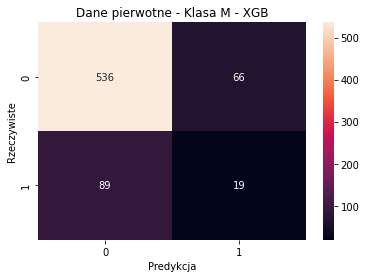

In [6]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa M - XGB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1)
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1)
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=[0,1], average='binary',pos_label=1, beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.176
Precision: 0.224
F1score: 0.197
